In [ ]:
import os
import gensim
import gensim.corpora as corpora
from functions import remove_stopwords

def model(bodyText,num):
    data = remove_stopwords(bodyText)
    
    id2word = corpora.Dictionary(data)
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data]
    num_topics = num
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
    for idx, topic in lda_model.show_topics(formatted=False):
        return ('{}'.format(' '.join([w[0] for w in topic])))

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

def topicCloud(topics,title):
    topics = ' '.join(topics)
    words = topics.split(' ')
    word_counts = Counter(words)
    print(word_counts.most_common(100))    
    word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(word_counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

In [8]:
import re
folder = '/srv/data/VirginiaEPTextClean'
topics = []
group1 = ['A27982', 'A73532', 'A16495', 'B00963', 'A16507', 'A14514', 'A14518', 'A14512', 'A14516', 'A14511', 'A14517', 'A14519', 'A14520', 'A14521', 'A10439', 'A10417', 'A10440', 'A10438', 'A10436', 'A68635', 'A68633', 'A34660', 'A34659', 'A02626', 'A04813', 'A34936', 'A02059', 'A19312', 'A67893', 'A19313']
group0 = ['A11464', 'A11467', 'A34663', 'A80611', 'A80608', 'A80630', 'A80637', 'A34689', 'A34679', 'A34666', 'A13288', 'A13287', 'A13290', 'A19588', 'A19589', 'A19583', 'A19590', 'A17499', 'A69161', 'A19581', 'A02058', 'A15050', 'A01006', 'A01009', 'B13579', 'A01004', 'A01012', 'A01007', 'A06632', 'A01005', 'A01011']
group2 = ['A11472', 'A11474', 'A27888', 'A62166', 'A16552', 'A16457', 'A16527_01', 'A16527_02', 'A16527_03', 'A16527_04', 'A16469', 'A73472', 'A16564', 'A02495']
group3 = ['A80614', 'A69149', 'A34693', 'A80640', 'A80633', 'A34599', 'A80625', 'A80622', 'B20736', 'A34673', 'A34678', 'B20727', 'A71036', 'A84399', 'B20729', 'A80626', 'A80639', 'A34672', 'A80635', 'A34675', 'A80636', 'A34674', 'A34669', 'B07540', 'B07539', 'A01008', 'A01010']

for file in os.listdir(folder):
    name = re.findall('\w{6}',file)[0]
    if name in group3: 
        path = os.path.join(folder,file)
        f = open(path,'r')
        text = f.readlines()
        topicWords = model(text,1)
        # print(file,': ',topicWords)
        print(file)
        topics.append(topicWords)
        f.close()
print('done')

A80614.txt
A69149.txt
A34693.txt
A80640.txt
A80633.txt
A34599.txt
A80625.txt
A80622.txt
B20736.txt
A34673.txt
A34678.txt
B20727.txt
A71036.txt
A84399.txt
B20729.txt
A80626.txt
A80639.txt
A34672.txt
A80635.txt
A34675.txt
A80636.txt
A34674.txt
A34669.txt
B07540.txt
B07539.txt
A01008.txt
A01010.txt
done


In [9]:
len(group3)

27

[('god', 23), ('christ', 18), ('church', 15), ('man', 12), ('give', 10), ('lord', 10), ('word', 6), ('power', 6), ('spirit', 5), ('work', 5), ('act', 5), ('cor', 5), ('covenant', 5), ('faith', 4), ('sin', 4), ('grace', 4), ('key', 3), ('way', 3), ('receive', 3), ('sanctification', 3), ('justification', 3), ('evidence', 3), ('answ', 3), ('quest', 3), ('commandment', 3), ('holy', 3), ('elder', 3), ('ans', 3), ('whether', 3), ('worship', 3), ('promise', 2), ('call', 2), ('believer', 2), ('baptism', 2), ('apostle', 2), ('member', 2), ('good', 2), ('thing', 2), ('government', 2), ('brethren', 2), ('seal', 2), ('use', 2), ('sacrament', 2), ('rom', 2), ('bread', 2), ('conscience', 1), ('religion', 1), ('persecute', 1), ('true', 1), ('truth', 1), ('persecution', 1), ('plant', 1), ('people', 1), ('land', 1), ('ordinance', 1), ('first', 1), ('appoint', 1), ('sing', 1), ('psalm', 1), ('song', 1), ('david', 1), ('gift', 1), ('spiritual', 1), ('evident', 1), ('jesus', 1), ('joh', 1), ('child', 1), 

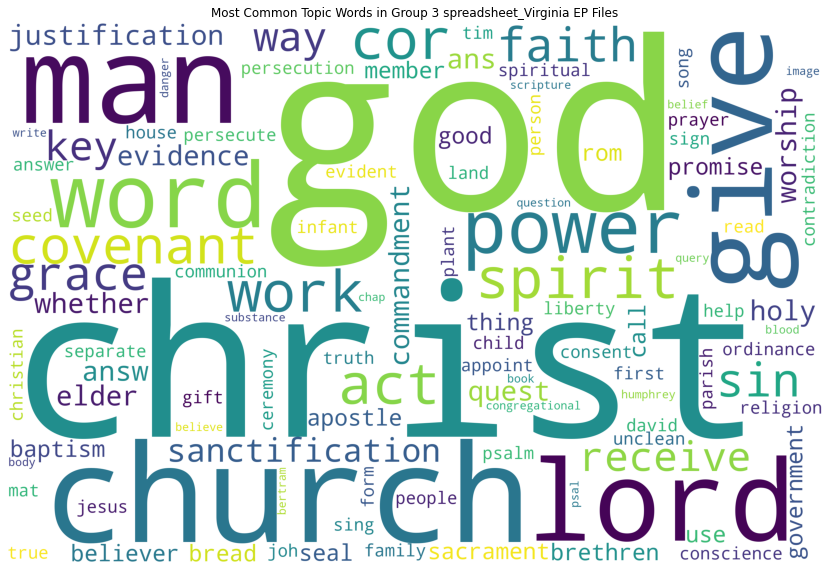

In [10]:
topicCloud(topics,'Most Common Topic Words in Group 3 spreadsheet_Virginia EP Files')